In [30]:
import sys
import poppy
from astropy.io import fits
import numpy as np
import multiprocessing # just in case
import matplotlib.pyplot as plt
from astropy import units as u

In [31]:
# assign shorthands for Fourier functions
fft2 = np.fft.fft2    # Fast Fourier transform
ifft2 = np.fft.ifft2  # Inverse discrete Fourier transform

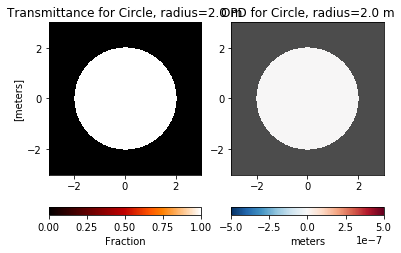

In [32]:
ap = poppy.CircularAperture(radius=2) # create a simple circular aperture
ap.display(what='both') # display both intensity and phase components

values = ap.sample(npix=512) # evaluate on 512 x 512 grid
ap.to_fits('test_circle.fits', npix=1024) # write to disk as a FITS file with higher sampling

In [33]:
import logging
logging.basicConfig(level=logging.DEBUG)

INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Added pupil plane: Circle, radius=3.0 m
INFO:poppy:Added detector with pixelscale=0.01 and oversampling=2: Detector
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 2e-06 m
INFO:poppy:You did not define npix either on the OpticalSystem or its first optic; defaulting to 1024 pixels.
DEBUG:poppy:Creating input wavefront with wavelength=2e-06 m, npix=1024, diam=6, pixel scale=0.00586 meters/pixel
DEBUG:poppy:  Wavefront and optic Circle, radius=3.0 m already at same plane type, no propagation needed.
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Circle, radius=3.0 m (Analytic)
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:poppy:  Propagating wavefront to Detector plane: Detector (500x500 pixels, 0.01 arcsec / pix). 
DEBUG:poppy:MatrixFourierTransform initialized using centering type = ADJUSTABLE
DEBUG:poppy:    Propagating w/ MFT: 0.0050 arcsec 

DEBUG:matplotlib.ticker:ticklocs [2e-08, 3.0000000000000004e-08, 4e-08, 5e-08, 6.000000000000001e-08, 7e-08, 8e-08, 9e-08, 2e-07, 3e-07, 4e-07, 5e-07, 6e-07, 7e-07, 8e-07, 9e-07, 2e-06, 3e-06, 4e-06, 4.9999999999999996e-06, 6e-06, 7e-06, 8e-06, 9e-06, 2e-05, 3.0000000000000004e-05, 4e-05, 5e-05, 6.000000000000001e-05, 7.000000000000001e-05, 8e-05, 9e-05, 0.0002, 0.00030000000000000003, 0.0004, 0.0005, 0.0006000000000000001, 0.0007, 0.0008, 0.0009000000000000001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0]
DEBUG:matplotlib.ticker:vmin 1e-07 vmax 0.1
DEBUG:matplotlib.ticker:ticklocs [2e-08, 3.0000000000000004e-08, 4e-08, 5e-08, 6.000000000000001e-08, 7e-08, 8e-08, 9e-08, 2e-07, 3e-07, 4e-07, 5e-07, 6e-07, 7e-07, 8e-07, 9e-07, 2e-06, 3e-06, 4e-

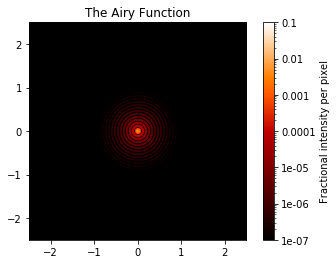

In [34]:
osys = poppy.OpticalSystem()
osys.add_pupil( poppy.CircularAperture(radius=3)) # pupil radius in meters
osys.add_detector(pixelscale=0.010, fov_arcsec=5.0) # image plane coordinates in arcseconds
psf = osys.calc_psf(2e-6) # wavelength in microns
poppy.display_psf(psf, title='The Airy Function')

DEBUG:poppy:Displaying Mock ATLAST, intensity
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for Mock ATLAST sampled onto 1024 pixel grid with pixelscale 0.013740234374999999 m / pix
INFO:poppy:Computing opd for Mock ATLAST sampled onto 1024 pixel grid with pixelscale 0.013740234374999999 m / pix
DEBUG:poppy:Display pixel scale = 0.013740234374999999 m / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2bd8fa2e10>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2bd8fa2e10>
DEBUG:matplotlib.colorbar:Setting pcolormesh


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


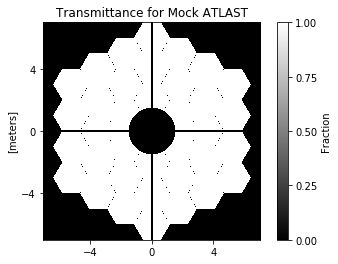

In [35]:
ap = poppy.MultiHexagonAperture(rings=3, flattoflat=2) # 3 rings of 2 m segments yields 14.1m circumscribed diameter
sec = poppy.SecondaryObscuration(secondary_radius=1.5, n_supports=4, support_width=0.1) # secondary with spiders
atlast = poppy.CompoundAnalyticOptic( opticslist=[ap, sec], name='Mock ATLAST') # combine into one optic
atlast.display(npix=1024, colorbar_orientation='vertical')

INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Added pupil plane: Mock ATLAST
INFO:poppy:Added detector with pixelscale=0.01 and oversampling=2: Detector
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 1e-06 m
INFO:poppy:You did not define npix either on the OpticalSystem or its first optic; defaulting to 1024 pixels.
DEBUG:poppy:Creating input wavefront with wavelength=1e-06 m, npix=1024, diam=14.1, pixel scale=0.0137 meters/pixel
DEBUG:poppy:  Wavefront and optic Mock ATLAST already at same plane type, no propagation needed.
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Mock ATLAST (Analytic)
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:poppy:  Propagating wavefront to Detector plane: Detector (200x200 pixels, 0.01 arcsec / pix). 
DEBUG:poppy:MatrixFourierTransform initialized using centering type = ADJUSTABLE
DEBUG:poppy:    Propagating w/ MFT: 0.0050 arcsec / pix     fov=136.427 lam

DEBUG:matplotlib.ticker:ticklocs [2e-08, 3.0000000000000004e-08, 4e-08, 5e-08, 6.000000000000001e-08, 7e-08, 8e-08, 9e-08, 2e-07, 3e-07, 4e-07, 5e-07, 6e-07, 7e-07, 8e-07, 9e-07, 2e-06, 3e-06, 4e-06, 4.9999999999999996e-06, 6e-06, 7e-06, 8e-06, 9e-06, 2e-05, 3.0000000000000004e-05, 4e-05, 5e-05, 6.000000000000001e-05, 7.000000000000001e-05, 8e-05, 9e-05, 0.0002, 0.00030000000000000003, 0.0004, 0.0005, 0.0006000000000000001, 0.0007, 0.0008, 0.0009000000000000001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0]
DEBUG:matplotlib.ticker:vmin 1e-07 vmax 0.1
DEBUG:matplotlib.ticker:ticklocs [2e-08, 3.0000000000000004e-08, 4e-08, 5e-08, 6.000000000000001e-08, 7e-08, 8e-08, 9e-08, 2e-07, 3e-07, 4e-07, 5e-07, 6e-07, 7e-07, 8e-07, 9e-07, 2e-06, 3e-06, 4e-

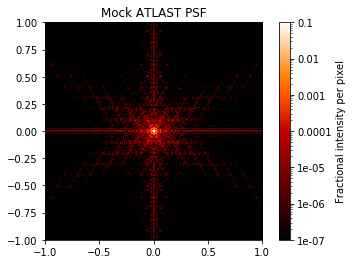

In [38]:
osys = poppy.OpticalSystem()
osys.add_pupil(atlast)
osys.add_detector(pixelscale=0.010, fov_arcsec=2.0)
psf = osys.calc_psf(1e-6)
poppy.display_psf(psf, title="Mock ATLAST PSF")

INFO:poppy:Initialized OpticalSystem: test
INFO:poppy:Added pupil plane: Circle, radius=3.0 m
INFO:poppy:Added pupil plane: Thin lens
INFO:poppy:Added detector with pixelscale=0.01 and oversampling=2: Detector
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 1e-06 m
INFO:poppy:You did not define npix either on the OpticalSystem or its first optic; defaulting to 1024 pixels.
DEBUG:poppy:Creating input wavefront with wavelength=1e-06 m, npix=1024, diam=6, pixel scale=0.00586 meters/pixel
DEBUG:poppy:  Wavefront and optic Circle, radius=3.0 m already at same plane type, no propagation needed.
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Circle, radius=3.0 m (Analytic)
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:poppy:  Wavefront and optic Thin lens already at same plane type, no propagation needed.
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Thin lens (Analytic)
DEBUG:poppy:  Propagating wavefr

DEBUG:poppy:  Wavefront and optic Thin lens already at same plane type, no propagation needed.
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Thin lens (Analytic)
DEBUG:poppy:  Propagating wavefront to Detector plane: Detector (400x400 pixels, 0.01 arcsec / pix). 
DEBUG:poppy:MatrixFourierTransform initialized using centering type = ADJUSTABLE
DEBUG:poppy:    Propagating w/ MFT: 0.0050 arcsec / pix     fov=116.355 lam/D    npix=800
DEBUG:poppy:      MFT method = ADJUSTABLE
DEBUG:poppy:Forward MatrixFourierTransform: array shape (1024, 1024), centering style ADJUSTABLE, output region size 116.35528346628864 in lambda / D units, output array size 800.0 pixels, offset (0, 0)
DEBUG:poppy:     Result wavefront: at=after Thin lens shape=(800, 800) intensity=0.997
INFO:poppy:  Calculation completed in 1.020 s
INFO:poppy:PSF Calculation completed.
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarLogLocator object at 0x7f2016674780>
DEBUG:matplotlib.colorbar:Using auto c

DEBUG:matplotlib.ticker:ticklocs []
DEBUG:matplotlib.ticker:vmin 1e-07 vmax 0.1
DEBUG:matplotlib.ticker:ticklocs []
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.ticker:vmin 1e-07 vmax 0.1
DEBUG:matplotlib.ticker:ticklocs []
DEBUG:matplotlib.ticker:vmin 1e-07 vmax 0.1
DEBUG:matplotlib.ticker:ticklocs []


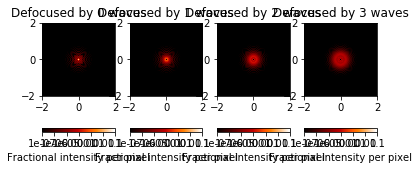

In [30]:
wavelen=1e-6
nsteps = 4
psfs = []
for nwaves in range(nsteps):
    osys = poppy.OpticalSystem("test", oversample=2)
    osys.add_pupil( poppy.CircularAperture(radius=3)) # pupil radius in meters
    osys.add_pupil( poppy.ThinLens(nwaves=nwaves, reference_wavelength=wavelen, radius=3))
    osys.add_detector(pixelscale=0.01, fov_arcsec=4.0)
    psf = osys.calc_psf(wavelength=wavelen)
    psfs.append(psf)
    plt.subplot(1,nsteps, nwaves+1)
    poppy.display_psf(psf, title='Defocused by {0} waves'.format(nwaves),
        colorbar_orientation='horizontal')

INFO:poppy:Initialized OpticalSystem: test
INFO:poppy:Added pupil plane: Circle, radius=3.25 m
INFO:poppy:Added image plane: -empty-
INFO:poppy:Added image plane: unnamed BLC
INFO:poppy:Added pupil plane: -empty-
INFO:poppy:Added pupil plane: Circle, radius=3.25 m
INFO:poppy:Added detector with pixelscale=0.01 and oversampling=2: Detector
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 4.6e-06 m
INFO:poppy:You did not define npix either on the OpticalSystem or its first optic; defaulting to 1024 pixels.
DEBUG:poppy:Creating input wavefront with wavelength=4.6e-06 m, npix=1024, diam=6.5, pixel scale=0.00635 meters/pixel
DEBUG:poppy:Tilted input wavefront by theta_X=-0.070711, theta_Y=0.070711 arcsec. (signs=1, 1; theta offset=0.000000) 
DEBUG:poppy:  Wavefront and optic Circle, radius=3.25 m already at same plane type, no propagation needed.
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Circle, radius=3.25 m (Analytic)
DEBUG:poppy:normalizing 

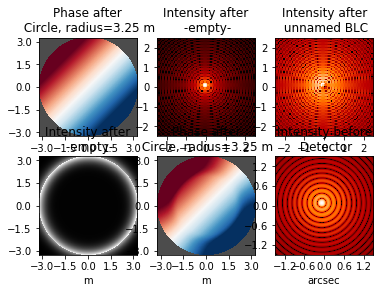

In [31]:
oversample=2
pixelscale = 0.010 #arcsec/pixel
wavelength = 4.6e-6
osys = poppy.OpticalSystem("test", oversample=oversample)
osys.add_pupil(poppy.CircularAperture(radius=6.5/2))
osys.add_image()
osys.add_image(poppy.BandLimitedCoron(kind='circular', sigma=5.0))
osys.add_pupil()
osys.add_pupil(poppy.CircularAperture(radius=6.5/2))
osys.add_detector(pixelscale=pixelscale, fov_arcsec=3.0)
osys.source_offset_theta = 45.
osys.source_offset_r = 0.1 # arcsec
psf = osys.calc_psf(wavelength=wavelength, display_intermediates=True)

INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Added pupil plane: Circle, radius=3.0 m
INFO:poppy:Added pupil plane: FQPM FFT aligner
INFO:poppy:Added image plane: -empty-
INFO:poppy:Added image plane: unnamed FQPM 
INFO:poppy:Added pupil plane: FQPM FFT aligner
INFO:poppy:Added pupil plane: Circle, radius=3.0 m
INFO:poppy:Added detector with pixelscale=0.01 and oversampling=2: Detector
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 2e-06 m
INFO:poppy:You did not define npix either on the OpticalSystem or its first optic; defaulting to 1024 pixels.
DEBUG:poppy:Creating input wavefront with wavelength=2e-06 m, npix=1024, diam=9, pixel scale=0.00879 meters/pixel
DEBUG:poppy:  Wavefront and optic Circle, radius=3.0 m already at same plane type, no propagation needed.
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Circle, radius=3.0 m (Analytic)
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:

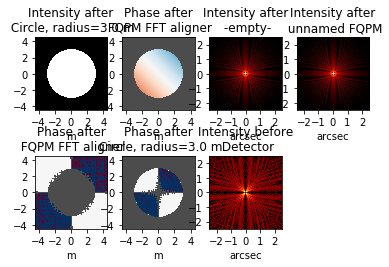

In [33]:
optsys = poppy.OpticalSystem()
optsys.add_pupil( poppy.CircularAperture( radius=3, pad_factor=1.5)) #pad display area by 50%
optsys.add_pupil( poppy.FQPM_FFT_aligner()) # ensure the PSF is centered on the FQPM cross hairs
optsys.add_image() # empty image plane for "before the mask"
optsys.add_image( poppy.IdealFQPM(wavelength=2e-6))
optsys.add_pupil( poppy.FQPM_FFT_aligner(direction='backward')) # undo the alignment tilt after going back to the pupil plane
optsys.add_pupil( poppy.CircularAperture( radius=3)) # Lyot mask - change radius if desired
optsys.add_detector(pixelscale=0.01, fov_arcsec=10.0)
psf = optsys.calc_psf(wavelength=2e-6, display_intermediates=True)

INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Added pupil plane: unnamed
INFO:poppy:Added pupil plane: FQPM FFT aligner
INFO:poppy:Added image plane: unnamed FQPM 
INFO:poppy:Added pupil plane: FQPM FFT aligner
INFO:poppy:Added pupil plane: Circle, radius=3.0 m
INFO:poppy:Added detector with pixelscale=0.01 and oversampling=2: Detector
INFO:poppy:Displaying plane unnamed in row 1 of 3
DEBUG:poppy:Displaying unnamed, intensity
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for unnamed sampled onto 512 pixel grid with pixelscale 0.017578125 m / pix
INFO:poppy:Computing opd for unnamed sampled onto 512 pixel grid with pixelscale 0.017578125 m / pix
DEBUG:poppy:Display pixel scale = 0.017578125 m / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2014a89ef0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x

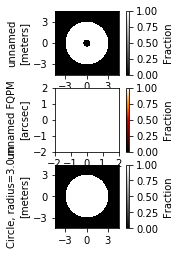

In [35]:
primary = poppy.CircularAperture( radius=3)
secondary = poppy.InverseTransmission( poppy.CircularAperture(radius=0.5) )
aperture = poppy.CompoundAnalyticOptic( opticslist = [primary, secondary] )
optsys = poppy.OpticalSystem()
optsys.add_pupil( aperture)
optsys.add_pupil( poppy.FQPM_FFT_aligner()) # ensure the PSF is centered on the FQPM cross hairs
optsys.add_image( poppy.IdealFQPM(wavelength=2e-6))
optsys.add_pupil( poppy.FQPM_FFT_aligner(direction='backward')) # undo the alignment tilt after going back to the pupil plane
optsys.add_pupil( poppy.CircularAperture( radius=3)) # Lyot mask - change radius if desired
optsys.add_detector(pixelscale=0.01, fov_arcsec=10.0)
optsys.display()

INFO:poppy:Initialized OpticalSystem: test
INFO:poppy:Added pupil plane: Circle, radius=3.25 m
INFO:poppy:Added image plane: unnamed occulter
INFO:poppy:Added pupil plane: Circle, radius=2.6 m
INFO:poppy:Added detector with pixelscale=0.06 and oversampling=8: Detector
INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 1e-06 m meters using Fast Semi-Analytic Coronagraph method
INFO:poppy:You did not define npix either on the OpticalSystem or its first optic; defaulting to 1024 pixels.
DEBUG:poppy:Creating input wavefront with wavelength=1e-06 m, npix=1024, diam=6.5, pixel scale=0.00635 meters/pixel
DEBUG:poppy:  Wavefront and optic Circle, radius=3.25 m already at same plane type, no propagation needed.
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Circle, radius=3.25 m (Analytic)
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:poppy:  Propagating wavefront to Detector plane: Oversampled Occ

Elapsed time, FFT: 117
Elapsed time, SAM: 3.0


DEBUG:matplotlib.ticker:vmin 1e-07 vmax 0.1
DEBUG:matplotlib.ticker:ticklocs [2e-08, 3.0000000000000004e-08, 4e-08, 5e-08, 6.000000000000001e-08, 7e-08, 8e-08, 9e-08, 2e-07, 3e-07, 4e-07, 5e-07, 6e-07, 7e-07, 8e-07, 9e-07, 2e-06, 3e-06, 4e-06, 4.9999999999999996e-06, 6e-06, 7e-06, 8e-06, 9e-06, 2e-05, 3.0000000000000004e-05, 4e-05, 5e-05, 6.000000000000001e-05, 7.000000000000001e-05, 8e-05, 9e-05, 0.0002, 0.00030000000000000003, 0.0004, 0.0005, 0.0006000000000000001, 0.0007, 0.0008, 0.0009000000000000001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0]
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.ticker:vmin 1e-07 vmax 0.1
DEBUG:matplotlib.ticker:ticklocs [2e-08, 3.0000000000000004e-0

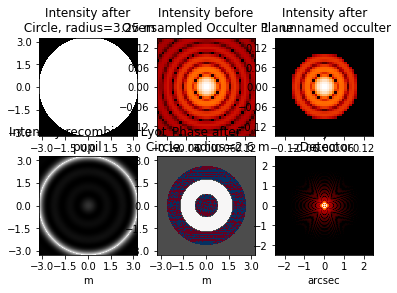

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


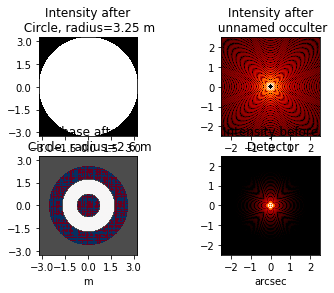

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.ticker:vmin 1e-07 vmax 0.1
DEBUG:matplotlib.ticker:ticklocs [2e-08, 3.0000000000000004e-08, 4e-08, 5e-08, 6.000000000000001e-08, 7e-08, 8e-08, 9e-08, 2e-07, 3e-07, 4e-07, 5e-07, 6e-07, 7e-07, 8e-07, 9e-07, 2e-06, 3e-06, 4e-06, 4.9999999999999996e-06, 6e-06, 7e-06, 8e-06, 9e-06, 2e-05, 3.0000000000000004e-05, 4e-05, 5e-05, 6.000000000000001e-05, 7.000000000000001e-05, 8e-05, 9e-05, 0.0002, 0.00030000000000000003, 0.0004, 0.0005, 0.0006000000000000001, 0.0007, 0.0008, 0.0009000000000000001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0]
DEBUG:matplotlib.ticker:vmin 1e-07 vmax 0.1
DEBUG:matplotlib.ticker:ticklocs [2e-08, 3.0000000000000004e-0

DEBUG:matplotlib.ticker:vmin 1e-07 vmax 0.1
DEBUG:matplotlib.ticker:ticklocs [2e-08, 3.0000000000000004e-08, 4e-08, 5e-08, 6.000000000000001e-08, 7e-08, 8e-08, 9e-08, 2e-07, 3e-07, 4e-07, 5e-07, 6e-07, 7e-07, 8e-07, 9e-07, 2e-06, 3e-06, 4e-06, 4.9999999999999996e-06, 6e-06, 7e-06, 8e-06, 9e-06, 2e-05, 3.0000000000000004e-05, 4e-05, 5e-05, 6.000000000000001e-05, 7.000000000000001e-05, 8e-05, 9e-05, 0.0002, 0.00030000000000000003, 0.0004, 0.0005, 0.0006000000000000001, 0.0007, 0.0008, 0.0009000000000000001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0]
DEBUG:matplotlib.ticker:vmin 1e-07 vmax 0.1
DEBUG:matplotlib.ticker:ticklocs [2e-08, 3.0000000000000004e-08, 4e-08, 5e-08, 6.000000000000001e-08, 7e-08, 8e-08, 9e-08, 2e-07, 3e-07, 4e-07, 5e-07, 6

DEBUG:matplotlib.ticker:vmin 1e-07 vmax 0.1
DEBUG:matplotlib.ticker:ticklocs [2e-08, 3.0000000000000004e-08, 4e-08, 5e-08, 6.000000000000001e-08, 7e-08, 8e-08, 9e-08, 2e-07, 3e-07, 4e-07, 5e-07, 6e-07, 7e-07, 8e-07, 9e-07, 2e-06, 3e-06, 4e-06, 4.9999999999999996e-06, 6e-06, 7e-06, 8e-06, 9e-06, 2e-05, 3.0000000000000004e-05, 4e-05, 5e-05, 6.000000000000001e-05, 7.000000000000001e-05, 8e-05, 9e-05, 0.0002, 0.00030000000000000003, 0.0004, 0.0005, 0.0006000000000000001, 0.0007, 0.0008, 0.0009000000000000001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0]
DEBUG:matplotlib.ticker:vmin 1e-07 vmax 0.1
DEBUG:matplotlib.ticker:ticklocs [2e-08, 3.0000000000000004e-08, 4e-08, 5e-08, 6.000000000000001e-08, 7e-08, 8e-08, 9e-08, 2e-07, 3e-07, 4e-07, 5e-07, 6

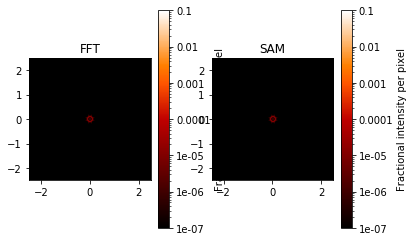

In [37]:
radius = 6.5/2
lyot_radius = 6.5/2.5
pixelscale = 0.060
osys = poppy.OpticalSystem("test", oversample=8)
osys.add_pupil( poppy.CircularAperture(radius=radius), name='Entrance Pupil')
osys.add_image( poppy.CircularOcculter(radius = 0.1) )
osys.add_pupil( poppy.CircularAperture(radius=lyot_radius), name='Lyot Pupil')
osys.add_detector(pixelscale=pixelscale, fov_arcsec=5.0)
plt.figure(1)
sam_osys = poppy.SemiAnalyticCoronagraph(osys, oversample=8, occulter_box=0.15)
import time
t0s = time.time()
psf_sam = sam_osys.calc_psf(display_intermediates=True)
t1s = time.time()
plt.figure(2)
t0f = time.time()
psf_fft = osys.calc_psf(display_intermediates=True)
t1f = time.time()
plt.figure(3)
plt.clf()
plt.subplot(121)
poppy.utils.display_psf(psf_fft, title="FFT")
plt.subplot(122)
poppy.utils.display_psf(psf_sam, title="SAM")
print ("Elapsed time, FFT: %.3s" % (t1f-t0f))
print ("Elapsed time, SAM: %.3s" % (t1s-t0s))

INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Added pupil plane: Circle, radius=2.0 m
INFO:poppy:Added detector with pixelscale=0.01 and oversampling=2: Detector
INFO:poppy:Calculating PSF with 1 wavelengths
INFO:poppy: Propagating wavelength = 1e-06 m
INFO:poppy:You did not define npix either on the OpticalSystem or its first optic; defaulting to 1024 pixels.
DEBUG:poppy:Creating input wavefront with wavelength=1e-06 m, npix=1024, diam=6, pixel scale=0.00586 meters/pixel
DEBUG:poppy:  Wavefront and optic Circle, radius=2.0 m already at same plane type, no propagation needed.
DEBUG:poppy:  Multiplied WF by phasor for Pupil plane: Circle, radius=2.0 m (Analytic)
DEBUG:poppy:normalizing at first plane (entrance pupil) to 1.0 total intensity
DEBUG:poppy:  Propagating wavefront to Detector plane: Detector (100x100 pixels, 0.01 arcsec / pix). 
DEBUG:poppy:MatrixFourierTransform initialized using centering type = ADJUSTABLE
DEBUG:poppy:    Propagating w/ MFT: 0.0050 arcsec 

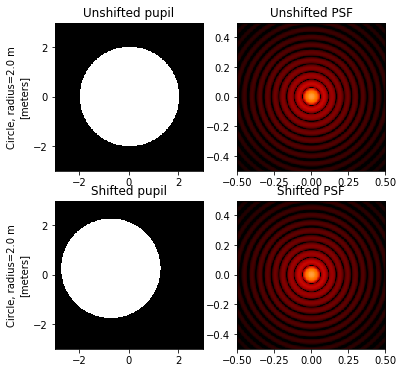

In [39]:
ap_regular = poppy.CircularAperture(radius=2, pad_factor=1.5) # pad_factor is important here - without it you will
ap_shifted = poppy.CircularAperture(radius=2, pad_factor=1.5) # crop off part of the circle outside the array. 
ap_shifted.shift_x =-0.75
ap_shifted.shift_y = 0.25
plt.figure(figsize=(6,6))
for optic, title, i in [(ap_regular, 'Unshifted', 1), (ap_shifted, 'Shifted', 3)]:
    sys = poppy.OpticalSystem()
    sys.add_pupil(optic)
    sys.add_detector(0.010, fov_pixels=100)
    psf = sys.calc_psf()
    ax1 = plt.subplot(2,2,i)
    optic.display(nrows=2, colorbar=False, ax=ax1)
    ax1.set_title(title+' pupil')
    ax2 = plt.subplot(2,2,i+1)
    poppy.display_psf(psf,ax=ax2, colorbar=False)
    ax2.set_title(title+' PSF')

DEBUG:poppy:Displaying Rectangle, size= 0.5 m wide * 1.0 m high, intensity
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for Rectangle, size= 0.5 m wide * 1.0 m high sampled onto 512 pixel grid with pixelscale 0.0021836601342771385 m / pix
INFO:poppy:Computing opd for Rectangle, size= 0.5 m wide * 1.0 m high sampled onto 512 pixel grid with pixelscale 0.0021836601342771385 m / pix
DEBUG:poppy:Display pixel scale = 0.0021836601342771385 m / pix 


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


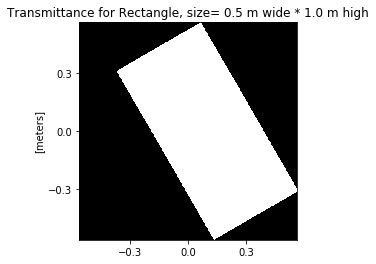

In [40]:
ap = poppy.RectangleAperture(rotation=30, shift_x=0.1)
ap.display(colorbar=False)

DEBUG:poppy:Displaying Circle, radius=1.0 m, both
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for Circle, radius=1.0 m sampled onto 512 pixel grid with pixelscale 0.005859375 m / pix
INFO:poppy:Computing opd for Circle, radius=1.0 m sampled onto 512 pixel grid with pixelscale 0.005859375 m / pix
DEBUG:poppy:Display pixel scale = 0.005859375 m / pix 
DEBUG:poppy:Displaying Circle, radius=1.0 m, intensity
DEBUG:poppy:Display pixel scale = 0.005859375 m / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2014917e80>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2014917e80>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:poppy:Displaying Circle, radius=1.0 m, opd
DEBUG:poppy:Display pixel scale = 0.005859375 m / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f20148fa588>
DEBUG:

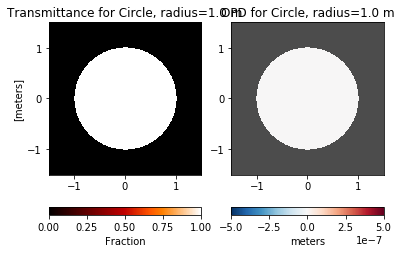

In [41]:
optic = poppy.CircularAperture(radius=1)
optic.display(what='both');

DEBUG:poppy:Displaying Square, side length= 1.0 m, both
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for Square, side length= 1.0 m sampled onto 512 pixel grid with pixelscale 0.00390625 m / pix
INFO:poppy:Computing opd for Square, side length= 1.0 m sampled onto 512 pixel grid with pixelscale 0.00390625 m / pix
DEBUG:poppy:Display pixel scale = 0.00390625 m / pix 
DEBUG:poppy:Displaying Square, side length= 1.0 m, intensity
DEBUG:poppy:Display pixel scale = 0.00390625 m / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f20166b2a90>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f20166b2a90>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:poppy:Displaying Square, side length= 1.0 m, opd
DEBUG:poppy:Display pixel scale = 0.00390625 m / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object 

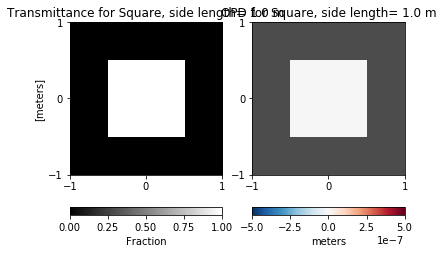

In [42]:
optic = poppy.SquareAperture(size=1.0)
optic.display(what='both');

DEBUG:poppy:Displaying Rectangle, size= 0.5 m wide * 1.0 m high, both
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for Rectangle, size= 0.5 m wide * 1.0 m high sampled onto 512 pixel grid with pixelscale 0.0021836601342771385 m / pix
INFO:poppy:Computing opd for Rectangle, size= 0.5 m wide * 1.0 m high sampled onto 512 pixel grid with pixelscale 0.0021836601342771385 m / pix
DEBUG:poppy:Display pixel scale = 0.0021836601342771385 m / pix 
DEBUG:poppy:Displaying Rectangle, size= 0.5 m wide * 1.0 m high, intensity
DEBUG:poppy:Display pixel scale = 0.0021836601342771385 m / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2014ad07b8>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2014ad07b8>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:poppy:Displaying Rectangle, size= 0.5 m wide * 1.0 m high, opd
DEBUG:poppy:Di

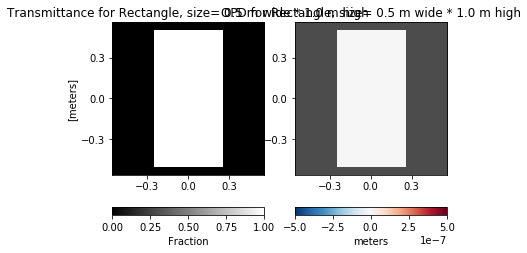

In [47]:
optic = poppy.RectangleAperture(width=0.5*u.m, height=1.0*u.m)
optic.display(what='both');

In [ ]:
optic = poppy.HexagonAperture(side=1.0)
optic.display(what='both');

In [ ]:
optic = poppy.MultiHexagonAperture(side=1, rings=1, gap=0.05, center=True)
optic.display(what='both');

DEBUG:poppy:Displaying 5-gon, radius= 1.0 m, both
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for 5-gon, radius= 1.0 m sampled onto 512 pixel grid with pixelscale 0.00390625 m / pix
INFO:poppy:Computing opd for 5-gon, radius= 1.0 m sampled onto 512 pixel grid with pixelscale 0.00390625 m / pix
DEBUG:poppy:Display pixel scale = 0.00390625 m / pix 
DEBUG:poppy:Displaying 5-gon, radius= 1.0 m, intensity
DEBUG:poppy:Display pixel scale = 0.00390625 m / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f201650a9b0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f201650a9b0>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:poppy:Displaying 5-gon, radius= 1.0 m, opd
DEBUG:poppy:Display pixel scale = 0.00390625 m / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f20173ef6a0>
DEBUG:matpl

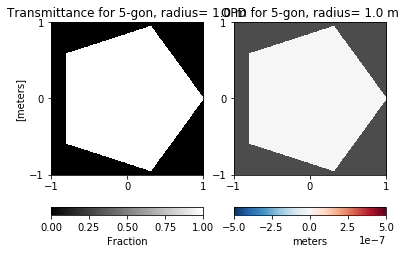

In [44]:
optic = poppy.NgonAperture(nsides=5)
optic.display(what='both');

DEBUG:poppy:Displaying Secondary Obscuration with 4 supports, both
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for Secondary Obscuration with 4 supports sampled onto 512 pixel grid with pixelscale 0.0078125 m / pix
INFO:poppy:Computing opd for Secondary Obscuration with 4 supports sampled onto 512 pixel grid with pixelscale 0.0078125 m / pix
DEBUG:poppy:Display pixel scale = 0.0078125 m / pix 
DEBUG:poppy:Displaying Secondary Obscuration with 4 supports, intensity
DEBUG:poppy:Display pixel scale = 0.0078125 m / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2014bda940>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2014bda940>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:poppy:Displaying Secondary Obscuration with 4 supports, opd
DEBUG:poppy:Display pixel scale = 0.0078125 m / pix 
DEBUG:matplotlib.colorba

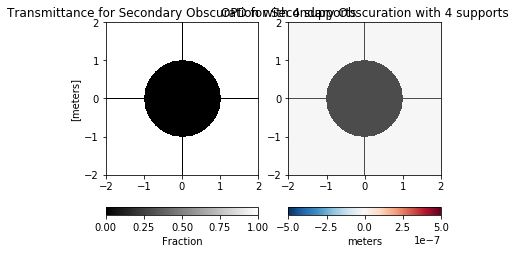

In [48]:
optic = poppy.SecondaryObscuration(secondary_radius=1.0,n_supports=4,support_width=5*u.cm)
optic.display(what='both');

DEBUG:poppy:Displaying Complex secondary, both
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for Complex secondary sampled onto 512 pixel grid with pixelscale 0.00234375 m / pix
INFO:poppy:Computing opd for Complex secondary sampled onto 512 pixel grid with pixelscale 0.00234375 m / pix
DEBUG:poppy:Display pixel scale = 0.00234375 m / pix 
DEBUG:poppy:Displaying Complex secondary, intensity
DEBUG:poppy:Display pixel scale = 0.00234375 m / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2016aa2080>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2016aa2080>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:poppy:Displaying Complex secondary, opd
DEBUG:poppy:Display pixel scale = 0.00234375 m / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2014af2668>
DEBUG:matplotlib.colorbar:

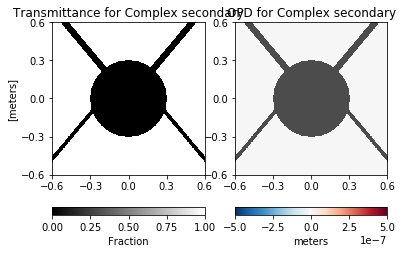

In [49]:
optic = poppy.AsymmetricSecondaryObscuration(secondary_radius=0.3*u.m,support_angle=(40, 140, 220, 320),
                                             support_width=[0.05, 0.03, 0.03, 0.05],
                                             support_offset_x=[0, -0.2, 0.2, 0],name='Complex secondary')
optic.display(what='both');

DEBUG:poppy:Displaying Thin lens, both
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for Thin lens sampled onto 512 pixel grid with pixelscale 0.05859375 cm / pix
INFO:poppy:Computing opd for Thin lens sampled onto 512 pixel grid with pixelscale 0.05859375 cm / pix
DEBUG:poppy:Display pixel scale = 0.05859375 cm / pix 
DEBUG:poppy:Displaying Thin lens, intensity
DEBUG:poppy:Display pixel scale = 0.05859375 cm / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f201681bc18>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f201681bc18>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:poppy:Displaying Thin lens, opd
DEBUG:poppy:Display pixel scale = 0.05859375 cm / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2014ac9278>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colo

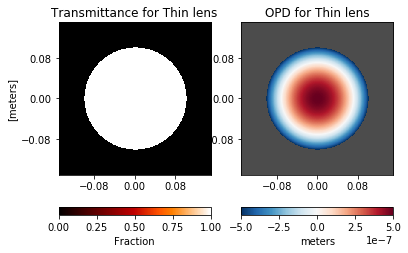

In [50]:
optic = poppy.ThinLens(nwaves=1, reference_wavelength=1e-6*u.m, radius=10*u.cm)
optic.display(what='both');

DEBUG:poppy:Displaying Gaussian aperture with fwhm =1.00 m, both
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for Gaussian aperture with fwhm =1.00 m sampled onto 512 pixel grid with pixelscale 0.005859374999999999 m / pix
INFO:poppy:Computing opd for Gaussian aperture with fwhm =1.00 m sampled onto 512 pixel grid with pixelscale 0.005859374999999999 m / pix
DEBUG:poppy:Display pixel scale = 0.005859374999999999 m / pix 
DEBUG:poppy:Displaying Gaussian aperture with fwhm =1.00 m, intensity
DEBUG:poppy:Display pixel scale = 0.005859374999999999 m / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f20149effd0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f20149effd0>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:poppy:Displaying Gaussian aperture with fwhm =1.00 m, opd
DEBUG:poppy:Display pixel scale = 0.0058593

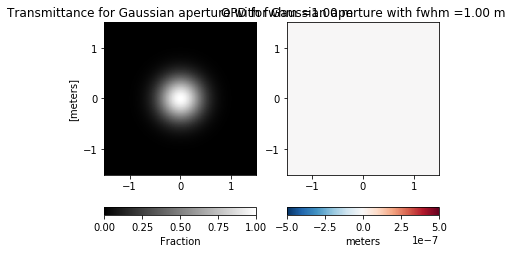

In [53]:
optic = poppy.GaussianAperture(fwhm=1*u.m)
optic.display(what='both');

DEBUG:poppy:Displaying Knife edge at 0 deg, both
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for Knife edge at 0 deg sampled onto 512 pixel grid with pixelscale 0.001953125 m / pix
INFO:poppy:Computing opd for Knife edge at 0 deg sampled onto 512 pixel grid with pixelscale 0.001953125 m / pix
DEBUG:poppy:Display pixel scale = 0.001953125 m / pix 
DEBUG:poppy:Displaying Knife edge at 0 deg, intensity
DEBUG:poppy:Display pixel scale = 0.001953125 m / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f20147941d0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f20147941d0>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:poppy:Displaying Knife edge at 0 deg, opd
DEBUG:poppy:Display pixel scale = 0.001953125 m / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f201476e860>
DEBUG:matpl

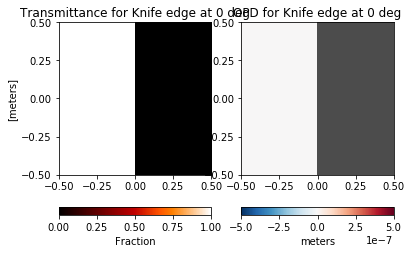

In [54]:
optic = poppy.optics.KnifeEdge(rotation=0)
optic.display(what='both');

DEBUG:poppy:Displaying unnamed field stop, both
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for unnamed field stop sampled onto 512 pixel grid with pixelscale 0.046875 arcsec / pix
INFO:poppy:Computing opd for unnamed field stop sampled onto 512 pixel grid with pixelscale 0.046875 arcsec / pix
DEBUG:poppy:Display pixel scale = 0.046875 arcsec / pix 
DEBUG:poppy:Displaying unnamed field stop, intensity
DEBUG:poppy:Display pixel scale = 0.046875 arcsec / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f20147bfdd8>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f20147bfdd8>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:poppy:Displaying unnamed field stop, opd
DEBUG:poppy:Display pixel scale = 0.046875 arcsec / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2014863080>
DEBUG:

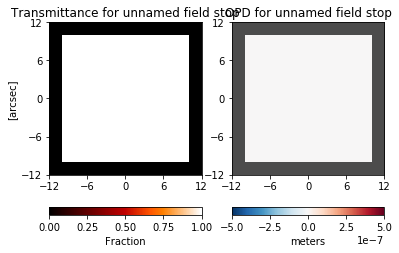

In [55]:
optic = poppy.SquareFieldStop()
optic.display(what='both');

DEBUG:poppy:Displaying unnamed field stop, both
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for unnamed field stop sampled onto 512 pixel grid with pixelscale 0.01171875 arcsec / pix
INFO:poppy:Computing opd for unnamed field stop sampled onto 512 pixel grid with pixelscale 0.01171875 arcsec / pix
DEBUG:poppy:Display pixel scale = 0.01171875 arcsec / pix 
DEBUG:poppy:Displaying unnamed field stop, intensity
DEBUG:poppy:Display pixel scale = 0.01171875 arcsec / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f20167f5470>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f20167f5470>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:poppy:Displaying unnamed field stop, opd
DEBUG:poppy:Display pixel scale = 0.01171875 arcsec / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2016466c

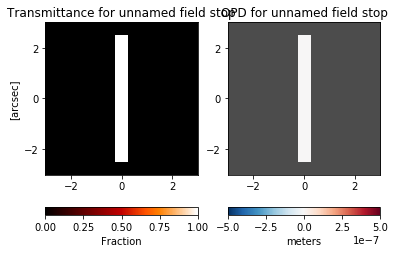

In [56]:
optic = poppy.RectangularFieldStop()
optic.display(what='both');

DEBUG:poppy:Displaying unnamed annular field stop, both
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for unnamed annular field stop sampled onto 512 pixel grid with pixelscale 0.01171875 arcsec / pix
INFO:poppy:Computing opd for unnamed annular field stop sampled onto 512 pixel grid with pixelscale 0.01171875 arcsec / pix
DEBUG:poppy:Display pixel scale = 0.01171875 arcsec / pix 
DEBUG:poppy:Displaying unnamed annular field stop, intensity
DEBUG:poppy:Display pixel scale = 0.01171875 arcsec / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f20167b3550>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f20167b3550>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:poppy:Displaying unnamed annular field stop, opd
DEBUG:poppy:Display pixel scale = 0.01171875 arcsec / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ti

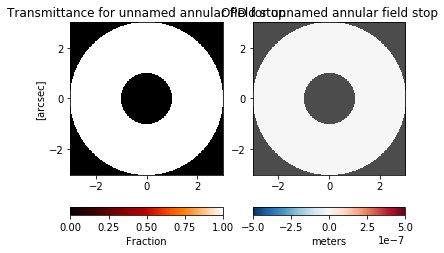

In [57]:
optic = poppy.optics.AnnularFieldStop(radius_inner=1, radius_outer=3)
optic.display(what='both');

DEBUG:poppy:Displaying Hexagon, side length= 1.0 arcsec, both
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for Hexagon, side length= 1.0 arcsec sampled onto 512 pixel grid with pixelscale 0.0078125 arcsec / pix
INFO:poppy:Computing opd for Hexagon, side length= 1.0 arcsec sampled onto 512 pixel grid with pixelscale 0.0078125 arcsec / pix
DEBUG:poppy:Display pixel scale = 0.0078125 arcsec / pix 
DEBUG:poppy:Displaying Hexagon, side length= 1.0 arcsec, intensity
DEBUG:poppy:Display pixel scale = 0.0078125 arcsec / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f201682aa20>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f201682aa20>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:poppy:Displaying Hexagon, side length= 1.0 arcsec, opd
DEBUG:poppy:Display pixel scale = 0.0078125 arcsec / pix 
DEBUG:matplotlib.colorba

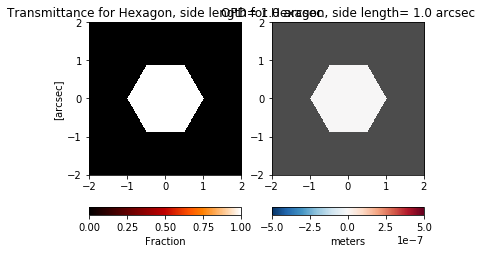

In [58]:
optic = poppy.optics.HexagonFieldStop()
optic.display(what='both');

DEBUG:poppy:Displaying unnamed occulter, both
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for unnamed occulter sampled onto 512 pixel grid with pixelscale 0.01953125 arcsec / pix
INFO:poppy:Computing opd for unnamed occulter sampled onto 512 pixel grid with pixelscale 0.01953125 arcsec / pix
DEBUG:poppy:Display pixel scale = 0.01953125 arcsec / pix 
DEBUG:poppy:Displaying unnamed occulter, intensity
DEBUG:poppy:Display pixel scale = 0.01953125 arcsec / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f201494ec18>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f201494ec18>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:poppy:Displaying unnamed occulter, opd
DEBUG:poppy:Display pixel scale = 0.01953125 arcsec / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2014b072b0>
DEBUG:

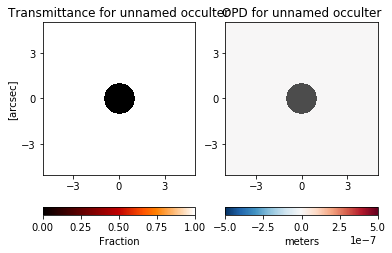

In [59]:
optic = poppy.optics.CircularOcculter()
optic.display(what='both');

DEBUG:poppy:Displaying bar occulter, both
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for bar occulter sampled onto 512 pixel grid with pixelscale 0.0234375 arcsec / pix
INFO:poppy:Computing opd for bar occulter sampled onto 512 pixel grid with pixelscale 0.0234375 arcsec / pix
DEBUG:poppy:Display pixel scale = 0.0234375 arcsec / pix 
DEBUG:poppy:Displaying bar occulter, intensity
DEBUG:poppy:Display pixel scale = 0.0234375 arcsec / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2016b41240>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2016b41240>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:poppy:Displaying bar occulter, opd
DEBUG:poppy:Display pixel scale = 0.0234375 arcsec / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2014aef940>
DEBUG:matplotlib.colorbar:Using

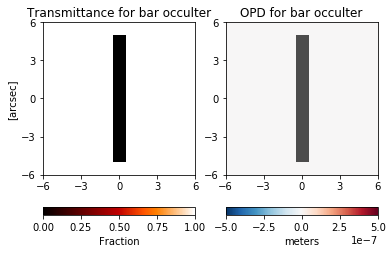

In [60]:
 optic = poppy.optics.BarOcculter(width=1, height=10)
optic.display(what='both');

DEBUG:poppy:Displaying unnamed BLC, both
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for unnamed BLC sampled onto 512 pixel grid with pixelscale 0.0390625 arcsec / pix
INFO:poppy:Computing opd for unnamed BLC sampled onto 512 pixel grid with pixelscale 0.0390625 arcsec / pix
DEBUG:poppy:Display pixel scale = 0.0390625 arcsec / pix 
DEBUG:poppy:Displaying unnamed BLC, intensity
DEBUG:poppy:Display pixel scale = 0.0390625 arcsec / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2014aaecc0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2014aaecc0>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:poppy:Displaying unnamed BLC, opd
DEBUG:poppy:Display pixel scale = 0.0390625 arcsec / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2014a1c9b0>
DEBUG:matplotlib.colorbar:Using auto

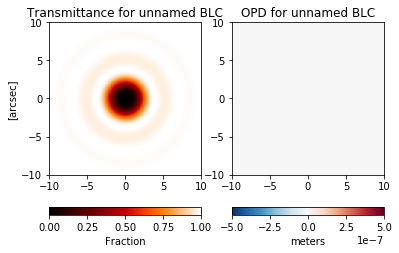

In [61]:
optic = poppy.BandLimitedCoronagraph()
optic.display(what='both');

DEBUG:poppy:Displaying unnamed FQPM , both
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for unnamed FQPM  sampled onto 512 pixel grid with pixelscale 0.0078125 arcsec / pix
INFO:poppy:Computing opd for unnamed FQPM  sampled onto 512 pixel grid with pixelscale 0.0078125 arcsec / pix
DEBUG:poppy:Display pixel scale = 0.0078125 arcsec / pix 
DEBUG:poppy:Displaying unnamed FQPM , intensity
DEBUG:poppy:Display pixel scale = 0.0078125 arcsec / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f20148d6b00>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f20148d6b00>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:poppy:Displaying unnamed FQPM , opd
DEBUG:poppy:Display pixel scale = 0.0078125 arcsec / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f20149c7240>
DEBUG:matplotlib.colorbar:

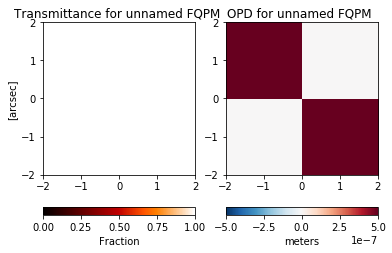

In [62]:
optic = poppy.IdealFQPM(wavelength=1*u.micron)
optic.display(what='both');

DEBUG:poppy:Displaying Scalar Transmission of 0.85, both
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for Scalar Transmission of 0.85 sampled onto 512 pixel grid with pixelscale 0.001953125 m / pix
INFO:poppy:Computing opd for Scalar Transmission of 0.85 sampled onto 512 pixel grid with pixelscale 0.001953125 m / pix
DEBUG:poppy:Display pixel scale = 0.001953125 m / pix 
DEBUG:poppy:Displaying Scalar Transmission of 0.85, intensity
DEBUG:poppy:Display pixel scale = 0.001953125 m / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2014a0d5f8>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2014a0d5f8>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:poppy:Displaying Scalar Transmission of 0.85, opd
DEBUG:poppy:Display pixel scale = 0.001953125 m / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocat

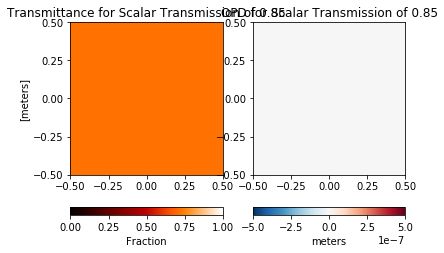

In [63]:
optic = poppy.ScalarTransmission(transmission=0.85)
optic.display(what='both');

DEBUG:poppy:Displaying Circle, radius=1.0 m, amplitude
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for Circle, radius=1.0 m sampled onto 512 pixel grid with pixelscale 0.005859375 m / pix
INFO:poppy:Computing opd for Circle, radius=1.0 m sampled onto 512 pixel grid with pixelscale 0.005859375 m / pix
DEBUG:poppy:Display pixel scale = 0.005859375 m / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f20146b28d0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f20146b28d0>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:poppy:Displaying 1 - Circle, radius=1.0 m, amplitude
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for 1 - Circle, radius=1.0 m sampled onto 512 pixel grid with pixelscale 0.005859375 m / pix
INFO:poppy:Computing opd for 1 - Circle, radius=1.0 m sampled onto 512 pix

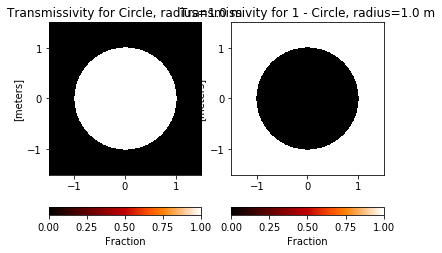

In [64]:
circ = poppy.CircularAperture(radius=1)
ax1= plt.subplot(121)
circ.display(what='amplitude', ax=ax1)
ax2= plt.subplot(122)
inverted_circ = poppy.InverseTransmission(circ)
inverted_circ.display(grid_size=3, what='amplitude', ax=ax2)

DEBUG:poppy:Displaying Zernike WFE, both
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for Zernike WFE sampled onto 512 pixel grid with pixelscale 5.859375e-05 m / pix
INFO:poppy:Computing opd for Zernike WFE sampled onto 512 pixel grid with pixelscale 5.859375e-05 m / pix
DEBUG:poppy:Display pixel scale = 5.859375e-05 m / pix 
DEBUG:poppy:Displaying Zernike WFE, intensity
DEBUG:poppy:Display pixel scale = 5.859375e-05 m / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f20145b5f60>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f20145b5f60>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:poppy:Displaying Zernike WFE, opd
DEBUG:poppy:Display pixel scale = 5.859375e-05 m / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f201451b550>
DEBUG:matplotlib.colorbar:Using auto colorbar 

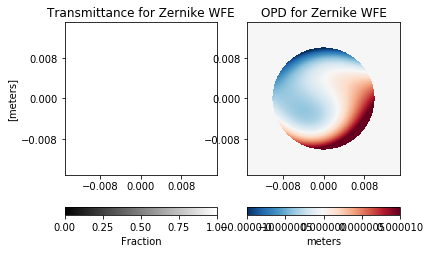

In [65]:
optic = poppy.ZernikeWFE(radius=1*u.cm,coefficients=[0.1e-6, 3e-6, -3e-6, 1e-6, -7e-7, 0.4e-6, -2e-6],aperture_stop=False)
optic.display(what='both', opd_vmax=1e-5, grid_size=0.03);

DEBUG:poppy:Displaying Zernike WFE, both
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for Zernike WFE sampled onto 512 pixel grid with pixelscale 5.859375e-05 m / pix
INFO:poppy:Computing opd for Zernike WFE sampled onto 512 pixel grid with pixelscale 5.859375e-05 m / pix
DEBUG:poppy:Display pixel scale = 5.859375e-05 m / pix 
DEBUG:poppy:Displaying Zernike WFE, intensity
DEBUG:poppy:Display pixel scale = 5.859375e-05 m / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f20144d9b38>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f20144d9b38>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:poppy:Displaying Zernike WFE, opd
DEBUG:poppy:Display pixel scale = 5.859375e-05 m / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2014946d68>
DEBUG:matplotlib.colorbar:Using auto colorbar 

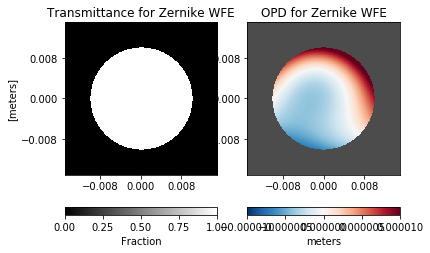

In [66]:
optic = poppy.ZernikeWFE(radius=1*u.cm,
                         coefficients=[0, 2e-6, 3e-6, 2e-6, 0, 0.4e-6, 1e-6],
                         aperture_stop=True)
optic.display(what='both', opd_vmax=1e-5, grid_size=0.03);

DEBUG:poppy:Displaying Sine WFE, both
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for Sine WFE sampled onto 512 pixel grid with pixelscale 0.001953125 m / pix
INFO:poppy:Computing opd for Sine WFE sampled onto 512 pixel grid with pixelscale 0.001953125 m / pix
DEBUG:poppy:Display pixel scale = 0.001953125 m / pix 
DEBUG:poppy:Displaying Sine WFE, intensity
DEBUG:poppy:Display pixel scale = 0.001953125 m / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f201694a4e0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f201694a4e0>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:poppy:Displaying Sine WFE, opd
DEBUG:poppy:Display pixel scale = 0.001953125 m / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f20168092b0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar


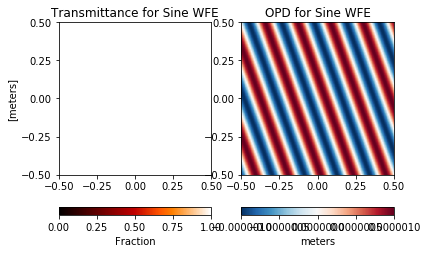

In [67]:
optic = poppy.SineWaveWFE(spatialfreq=5/u.meter,
                          amplitude=1*u.micron,
                          rotation=20)
optic.display(what='both', opd_vmax=1*u.micron);

DEBUG:poppy:Displaying DM, both
DEBUG:poppy:Optic must be sampled to be displayed.
INFO:poppy:Computing amplitude for DM sampled onto 512 pixel grid with pixelscale 0.009375 mm / pix
INFO:poppy:Computing opd for DM sampled onto 512 pixel grid with pixelscale 0.009375 mm / pix
DEBUG:poppy:Display pixel scale = 0.009375 mm / pix 
DEBUG:poppy:Displaying DM, intensity
DEBUG:poppy:Display pixel scale = 0.009375 mm / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2016686e10>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2016686e10>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:poppy:Displaying DM, opd
DEBUG:poppy:Display pixel scale = 0.009375 mm / pix 
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.FixedLocator object at 0x7f2016aae1d0>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matp

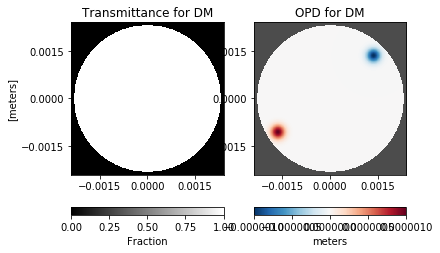

In [68]:
dm = poppy.dms.ContinuousDeformableMirror(dm_shape=(16,16), actuator_spacing=0.3*u.mm, radius=2.3*u.mm)
dm.set_actuator(2, 4, 1e-6)
dm.set_actuator(12, 12, -1e-6)
dm.display(what='both', opd_vmax=1*u.micron);

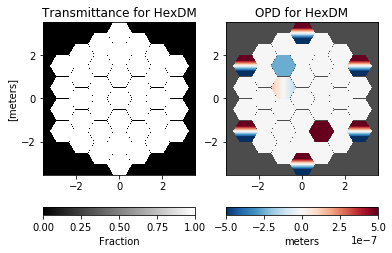

In [9]:
hexdm = poppy.dms.HexSegmentedDeformableMirror(rings=3)
hexdm.set_actuator(12, 0.5*u.micron, 0, 0)
hexdm.set_actuator(18, -0.25*u.micron, 0, 0)
hexdm.set_actuator(6, 0, -0.25*u.microradian, 0)
for i in range (19, 37, 3): hexdm.set_actuator(i, 0, 0, 2*u.microradian)
hexdm.display(what='both');

In [10]:
wfe = poppy.ZernikeWFE(radius=1.0, coefficients=[0, 3e-8, 2e-7])

In [11]:
RADIUS = 1.0 # meters
WAVELENGTH = 460e-9 # meters
PIXSCALE = 0.01 # arcsec / pix
FOV = 1 # arcsec
NWAVES = 1.0

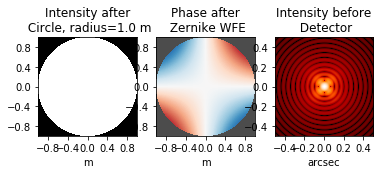

In [12]:
coefficients_sequence = [0, 0, 0, 0, 35e-9]
osys = poppy.OpticalSystem()
circular_aperture = poppy.CircularAperture(radius=RADIUS)
osys.add_pupil(circular_aperture)
thinlens = poppy.ZernikeWFE(radius=RADIUS, coefficients=coefficients_sequence)
osys.add_pupil(thinlens)
osys.add_detector(pixelscale=PIXSCALE, fov_arcsec=FOV)
psf_with_zernikewfe = osys.calc_psf(wavelength=WAVELENGTH, display_intermediates=True)

In [16]:
wfe_budget = [0, 100, 100, 50, 36, 36]
def generate_coefficients(wfe_budget):
    coefficients = []
    for term in wfe_budget:
        coefficients.append(
        # convert nm to meters, get value in range
        np.random.uniform(low=-1e-9 * term, high=1e-9 * term)
        )
    return coefficients

possible_coefficients = [generate_coefficients(wfe_budget) for i in range(5)]

plt.figure(figsize=(18,2))
results = []
for coefficient_set in possible_coefficients:
    osys = poppy.OpticalSystem()
    circular_aperture = poppy.CircularAperture(radius=RADIUS)
    osys.add_pupil(circular_aperture)
    zwfe = poppy.ZernikeWFE(coefficients=coefficient_set,radius=RADIUS)
    osys.add_pupil(zwfe)
    osys.add_detector(pixelscale=PIXSCALE, fov_arcsec=FOV)
    psf = osys.calc_psf(wavelength=WAVELENGTH, display=False)
    results.append(psf)
    
plt.show()

<Figure size 1296x144 with 0 Axes>

/home/jinlng/test_dir/test_env/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/jinlng/test_dir/test_env/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/home/jinlng/test_dir/test_env/lib/python3.6/s

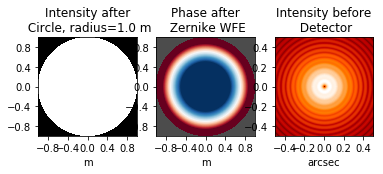

In [14]:
osys = poppy.OpticalSystem()
circular_aperture = poppy.CircularAperture(radius=RADIUS)
osys.add_pupil(circular_aperture)
thinlens = poppy.ThinLens(nwaves=NWAVES, reference_wavelength=WAVELENGTH, radius=RADIUS)
osys.add_pupil(thinlens)
osys.add_detector(pixelscale=PIXSCALE, fov_arcsec=FOV)
psf_thinlens = osys.calc_psf(wavelength=WAVELENGTH, display_intermediates=True)

defocus_coefficient = NWAVES * WAVELENGTH / (2 * np.sqrt(3))
coefficients_sequence = [0, 0, 0, defocus_coefficient]
osys = poppy.OpticalSystem()
circular_aperture = poppy.CircularAperture(radius=RADIUS)
osys.add_pupil(circular_aperture)
zernikewfe = poppy.ZernikeWFE(radius=RADIUS, coefficients=coefficients_sequence)
osys.add_pupil(zernikewfe)
osys.add_detector(pixelscale=PIXSCALE, fov_arcsec=FOV)
psf_zernikewfe = osys.calc_psf(wavelength=WAVELENGTH, display_intermediates=True)

In [17]:
from poppy import zernike
osys = poppy.OpticalSystem()
circular_aperture = poppy.CircularAperture(radius=RADIUS)
osys.add_pupil(circular_aperture)
thinlens = poppy.ParameterizedWFE(radius=RADIUS,
                                  coefficients=[0, 0, 0, NWAVES * WAVELENGTH / (2 * np.sqrt(3))],
                                  basis_factory=zernike.zernike_basis # here's where we specify the basis set)
osys.add_pupil(thinlens)
osys.add_detector(pixelscale=PIXSCALE, fov_arcsec=FOV)
psf_with_zernikewfe = osys.calc_psf(wavelength=WAVELENGTH, display_intermediates=True)

SyntaxError: invalid syntax (<ipython-input-17-40a5f3cc558d>, line 8)

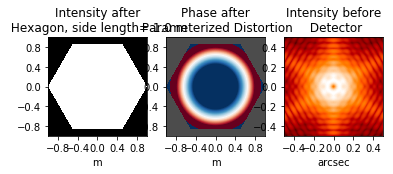

In [22]:
from poppy import zernike
osys = poppy.OpticalSystem()
hex_aperture = poppy.HexagonAperture(side=RADIUS) # modified to use hexagonal aperture
osys.add_pupil(hex_aperture)
thinlens = poppy.ParameterizedWFE(radius=RADIUS,
coefficients=[0, 0, 0, NWAVES * WAVELENGTH / (2 * np.sqrt(3))],
basis_factory=zernike.hexike_basis # now using the 'hexike' basis
)
osys.add_pupil(thinlens)
osys.add_detector(pixelscale=PIXSCALE, fov_arcsec=FOV)
psf_with_hexikewfe = osys.calc_psf(wavelength=WAVELENGTH, display_intermediates=True, return_intermediates=True)

In [24]:
class myCustomOptic(poppy.AnalyticOpticalElement):
    def __init__(self, *args, **kwargs):
        """ If your optic has adjustible parameters, then save them as attributes here """
        poppy.AnalyticOpticalElement.__init__(**kwargs)
        
    def get_opd(self,wave):
        y, x = self.get_coordinates(wave)
        opd = some_function(x,y, wave.wavelength, self)
        return opd
    
    def get_transmission(self, wave):
        y, x = self.get_coordinates(wave)
        transmission = other_function(x,y, wave.wavelength, self)
        return transmission
    
    # behind the scenes poppy will calculate:
    # phasor = transmission = np.exp(1.j * 2 * np.pi / wave.wavelength * opd)